<a href="https://colab.research.google.com/github/oneryigit/tutorials/blob/main/Bulgarian_Turks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geocoding Ethnic Groups using `geopandas`


- Data: Ethnic Power Relations: [You can find it here](https://icr.ethz.ch/data/epr/geoepr/)

- I show where ethnic Turks live in Bulgaria according to EPR.


In [1]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 4.1 MB/s 
     |████████████████████████████████| 16.7 MB 284 kB/s 
     |████████████████████████████████| 6.3 MB 35.8 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt

## Reading GEO_EPR Dataset

In [4]:
df= pd.read_csv('GeoEPR-2021.csv')

df.head()

,gwid,statename,from,to,group,groupid,gwgroupid,umbrella,sqkm,type,the_geom
0,2,United States of America,1946,1958,Whites,1000,201000,NaN,7940038,Statewide,SRID=4326;MULTIPOLYGON (((-93.81889091978115 4...
1,2,United States of America,1946,1958,African Americans,3000,203000,NaN,1037020,Regional & urban,SRID=4326;MULTIPOLYGON (((-73.17778189969161 4...
2,2,United States of America,1946,1958,American Indians,5000,205000,NaN,939761,Regionally based,SRID=4326;MULTIPOLYGON (((-73.91164589888828 4...
3,2,United States of America,1959,1959,Whites,1000,201000,NaN,7940038,Statewide,SRID=4326;MULTIPOLYGON (((-93.81889091978115 4...
4,2,United States of America,1959,1959,African Americans,3000,203000,NaN,1037020,Regional & urban,SRID=4326;MULTIPOLYGON (((-73.17778189969161 4...


In [5]:
#Subseting Bulgaria

bulgaria=df[df['statename']=='Bulgaria']

bulgaria #so only Turks and Bulgarians have geocoding. 

,gwid,statename,from,to,group,groupid,gwgroupid,umbrella,sqkm,type,the_geom
277,355,Bulgaria,1958,2021,Bulgarians,1000,35501000,NaN,111010,Statewide,SRID=4326;MULTIPOLYGON (((22.93560019 41.34212...
278,355,Bulgaria,1958,2021,Turkish,2000,35502000,NaN,9990,Regionally based,SRID=4326;MULTIPOLYGON (((28.24634531 43.72921...
279,355,Bulgaria,1958,2021,Roma,3000,35503000,NaN,0,Dispersed,SRID=4326;MULTIPOLYGON EMPTY
280,355,Bulgaria,1958,1989,Pomaks,4000,35504000,NaN,0,Dispersed,SRID=4326;MULTIPOLYGON EMPTY
281,355,Bulgaria,1999,2021,Macedonians,5000,35505000,NaN,0,Dispersed,SRID=4326;MULTIPOLYGON EMPTY


In [6]:
#Subseting Bulgaria

bulgar=df[df['statename']=='Bulgaria']

#I am not sure why EPR has 'SRID=4326' attached to the geometry column.
# So I deleted using regex. I am sure there is another way too. 
bulgar['the_geom']=bulgar.the_geom.str.replace(r'SRID=4326;','')

#assigning geometry column from EPR
bulgar['the_geom']=gpd.GeoSeries.from_wkt(bulgar['the_geom'])
#creating geo DataFrame
bul_geo=gpd.GeoDataFrame(bulgar, geometry=bulgar['the_geom'], crs='EPSG:4326')

# where Turks are in Bulgaria
turk_bul=bul_geo[bul_geo.group=='Turkish']

turk_bul

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,gwid,statename,from,to,group,groupid,gwgroupid,umbrella,sqkm,type,the_geom,geometry
278,355,Bulgaria,1958,2021,Turkish,2000,35502000,NaN,9990,Regionally based,"MULTIPOLYGON (((28.24635 43.72922, 28.29413 43...","MULTIPOLYGON (((28.24635 43.72922, 28.29413 43..."


##ShapeFile of Bulgaria

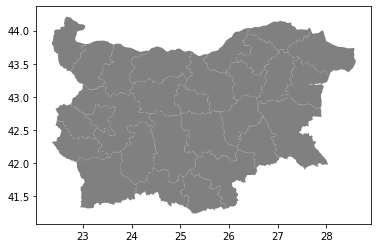

In [7]:
# Bulgaria's borders, our base map.
# Reading from shape file. 

BUL= gpd.read_file('/content/drive/MyDrive/shapefiles/bulgaria shape/bgr_admbnda_adm1_UNICEF_2019.shp')

BUL.plot(color='gray');

## ShapeFile of Turkey

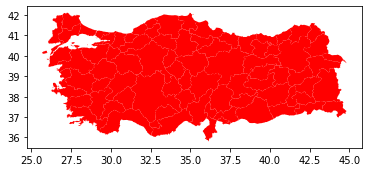

In [8]:
# Turkey's borders
# Reading from shape file.

TR=gpd.read_file('/content/drive/MyDrive/shapefiles/turkey shape/tur_polbnda_adm1.shp')

TR.plot(color='r');

## Major cities

In [9]:
# just search for latitude and longitude from google

cities={'city':['Istanbul', 'Sofia'],
    'latitude':[41.008, 42.697],
    'longitude':[28.978, 23.321]}

cities_df=pd.DataFrame(cities)

cities_df

,city,latitude,longitude
0,Istanbul,41.008,28.978
1,Sofia,42.697,23.321


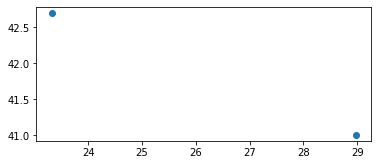

In [10]:
#turn pandas dataframe into a geo dataframe. 
city_geo = gpd.GeoDataFrame(cities_df, 
                            geometry=gpd.points_from_xy(cities_df.longitude,cities_df.latitude),
                            crs="EPSG:4326")

city_geo.plot() # the points are actually Sofia and Istanbul :) 

## Ploting full map

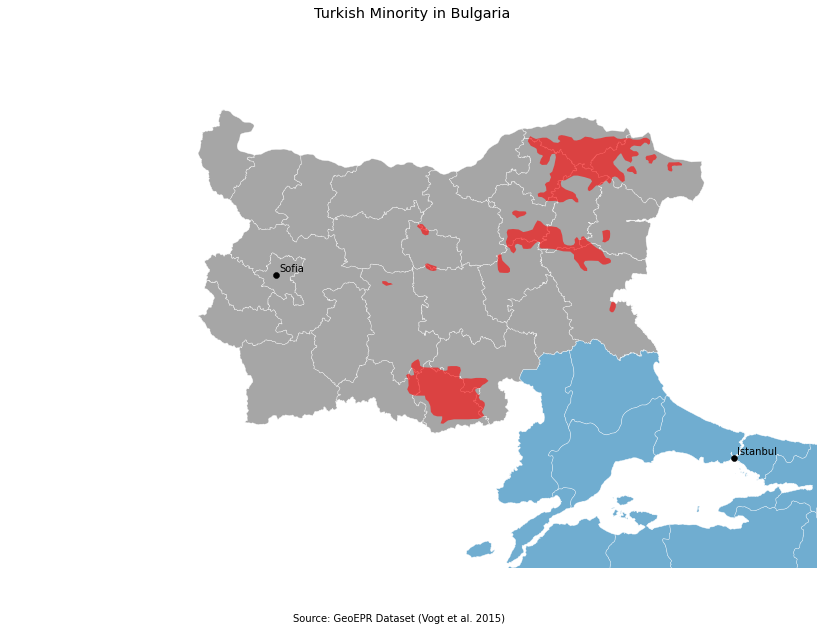

In [13]:
plt.style.use('ggplot')

fig, ax= plt.subplots(figsize=(15,10))

BUL.plot(ax=ax,color='gray', edgecolor='w',alpha=0.7) #Bulgaria
TR.plot(ax=ax, edgecolor='w', alpha=0.7) #Turkey
turk_bul.plot(ax=ax,color='r', alpha=0.6) #Turkish minority
city_geo.plot(ax=ax, color='k') #city points


ax.set_title('Turkish Minority in Bulgaria')
ax.axis([20,30, 40,45])
ax.set_axis_off()


for x, y, label in zip(city_geo.geometry.x, city_geo.geometry.y, city_geo.city):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

txt="Source: GeoEPR Dataset (Vogt et al. 2015)"
plt.figtext(0.5, 0.05, txt, wrap=True, horizontalalignment='center', fontsize=10);

fig.savefig('Turkish Minority in Bulgaria.pdf')

### The end!